In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [22]:
df = pd.read_csv('GameSales_cleaned.csv')

In [23]:
df = df.loc[df['Plat_Brand'].isin(['Nintendo', 'Sony', 'Microsoft'])]

In [24]:
conditions = [
    (df['Year_of_Release'] > 1999) & (df['Year_of_Release'] <= 2005),
    (df['Year_of_Release'] > 2005) & (df['Year_of_Release'] <= 2010),
    (df['Year_of_Release'] > 2010) & (df['Year_of_Release'] <= 2015)
]

values = [1,2,3]

df['era'] = np.select(conditions, values)
df_new = df[df['era'].isin([1,2,3])]
df_new.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Plat_Brand,era
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Nintendo,2
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo,2
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Nintendo,2
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,Nintendo,2
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Nintendo,2


In [31]:
df_new.groupby(['era', 'Plat_Brand'])[['Global_Sales']].sum()

Global_Sales
era Plat_Brand              
1   Microsoft         249.48
    Nintendo          704.20
    Sony             1159.22
2   Microsoft         583.58
    Nintendo         1434.13
    Sony              960.95
3   Microsoft         378.90
    Nintendo          454.06
    Sony              765.67

In [91]:
df_era1 = df[df['era']==1]
genre1 = pd.crosstab(df_era1.Plat_Brand, df_era1.Genre)
genre1

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plat_Brand,,,,,,,,,,,,
Microsoft,143,25,42,44,47,7,115,23,117,23,149,20
Nintendo,268,58,72,160,228,76,138,113,93,43,214,39
Sony,272,77,106,139,103,30,210,146,155,69,344,55


In [67]:
df_era2 = df[df['era']==2]
genre2 = pd.crosstab(df_era2.Plat_Brand, df_era2.Genre)
genre2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plat_Brand,,,,,,,,,,,,
Microsoft,178,22,37,69,18,6,71,52,124,22,157,26
Nintendo,472,297,70,545,125,238,140,210,92,335,361,88
Sony,403,265,146,253,71,38,150,224,136,67,336,78


In [68]:
df_era3 = df[df['era']==3]
genre3 = pd.crosstab(df_era3.Plat_Brand, df_era3.Genre)
genre3

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plat_Brand,,,,,,,,,,,,
Microsoft,145,26,30,54,8,0,37,23,79,15,66,2
Nintendo,318,56,22,170,60,54,26,106,24,43,73,27
Sony,495,237,84,97,32,4,59,236,103,23,156,35


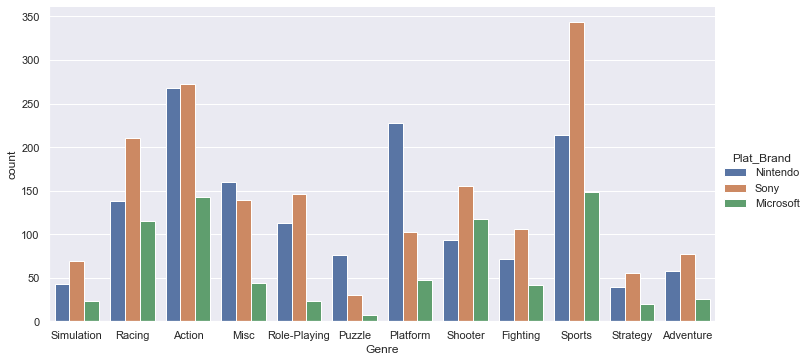

In [65]:
# 2000-2005 Genres for each Platform

sns.catplot(x='Genre', hue='Plat_Brand', kind='count', data=df_era1, height=5, aspect=2)

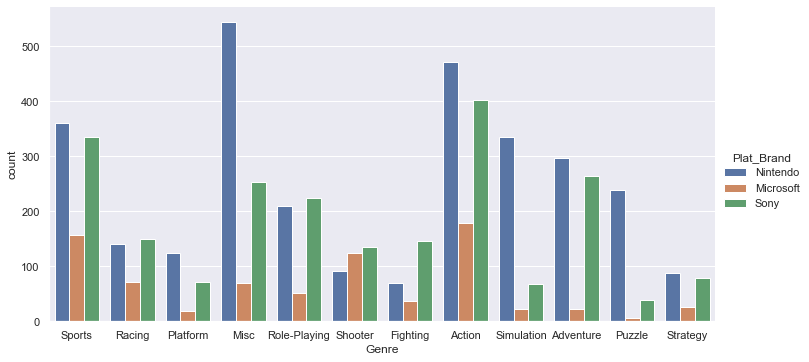

In [66]:
# 2006-2010 Genres for each Platform
sns.catplot(x='Genre', hue='Plat_Brand', kind='count', data=df_era2, height=5, aspect=2)

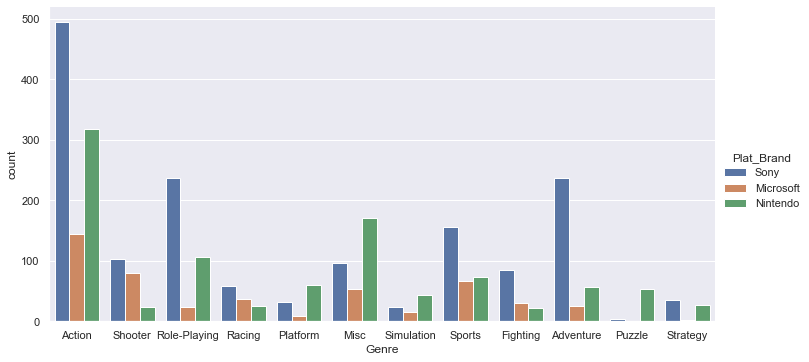

In [69]:
# 2011-2015 Genres for each Platform
sns.catplot(x='Genre', hue='Plat_Brand', kind='count', data=df_era3, height=5, aspect=2)

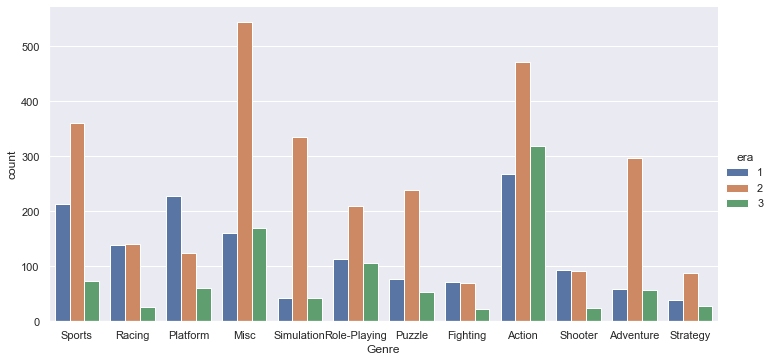

In [92]:
# Nintendo genre trend for 3 eras

df_nintendo = df.loc[(df['era'].isin([1,2,3])) & (df['Plat_Brand']=='Nintendo')]
sns.catplot(x='Genre', hue='era', kind='count', data=df_nintendo, height=5, aspect=2)

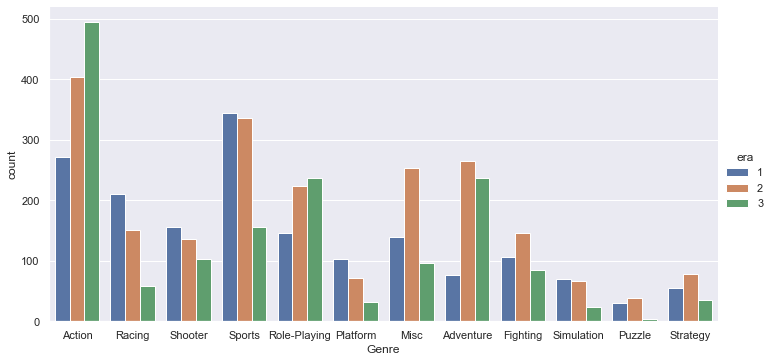

In [93]:
# Sony genre trend for 3 eras

df_sony = df.loc[(df['era'].isin([1,2,3])) & (df['Plat_Brand']=='Sony')]
sns.catplot(x='Genre', hue='era', kind='count', data=df_sony, height=5, aspect=2)

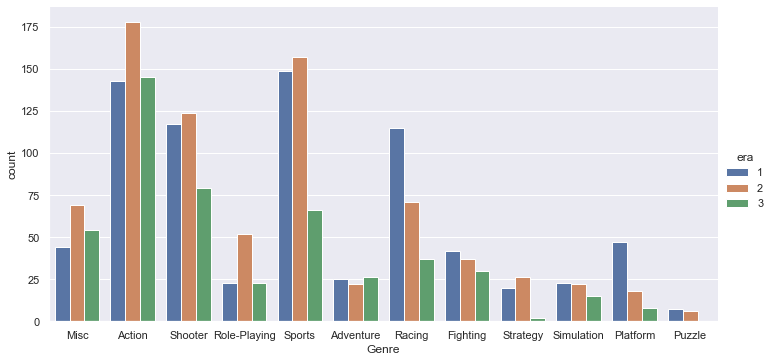

In [94]:
# MS genre trend for 3 eras

df_ms = df.loc[(df['era'].isin([1,2,3])) & (df['Plat_Brand']=='Microsoft')]
sns.catplot(x='Genre', hue='era', kind='count', data=df_ms, height=5, aspect=2)